In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [4]:
df = pd.read_csv('insurance.csv') # loading the dataset

## Encoding Categorical Features (one-hot encoding)

In [5]:
# One-Hot Encode
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [6]:
df_encoded.head() # checking the rows and columns after encoding

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Training Model (Linear Regression Model)

In [7]:
# Separating features and target

X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

In [8]:
# Splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, y_test.shape

((1070, 8), (268,))

In [10]:
# Fiting the model 

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation

In [11]:
mae = mean_absolute_error(y_test, y_pred) # Evaluating mean absolute error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Evaluating root mean squared error

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 4181.194473753654
RMSE: 5796.2846592762735


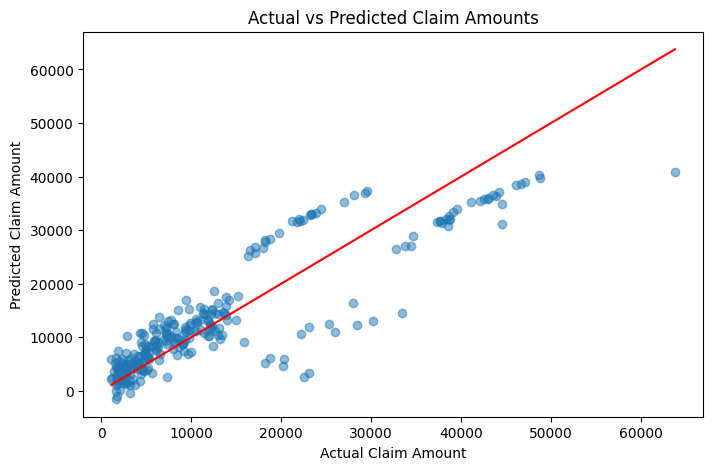

In [12]:
# Visualizing how the model has performed using a Scatter Plot

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs Predicted Claim Amounts")
plt.xlabel("Actual Claim Amount")
plt.ylabel("Predicted Claim Amount")

# reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()

## Conclusion

The model successfully learned a positive relationship between features and insurance charges. The visualization shows an upward trend and reasonable alignment with the diagonal line, meaning predictions improved significantly compared to constant-average outputs before. While some spread remains for higher charge values, the model demonstrates a working regression pipeline and trend learning, fulfilling the internship task requirements.